[Link to source code](https://github.com/AidMMcMillan/AidMMcMillan.github.io/tree/main/posts/blog3/logistic_regression.py)

# Finding Gradient of Emperical Risk Funtion

In order to calculate the gradient descent of the emprical risk fuction, I first had to define the derivitive of the logistic loss function:
```python
    def d_logistic_loss(self, y_hat, y):
        return self.sigmoid(y_hat) - y
```
Then I defined the gradient as:
```python
    def gradient(self, X, y, d_loss):
        return np.mean(np.swapaxes(X, 0, 1)*d_loss(X@self.w, y), axis = 1) 
```

I used ```np.swapaxes()``` to flip the first and second axes of $\tilde{\mathbf{X}}$. That allowed me to be able to multiply each $\mathbf{x}_i$ in $\tilde{\mathbf{X}}$ by $\frac{d\ell(\langle \mathbf{w}, \mathbf{x}_i \rangle, y_i)}{d\hat{y}}$. I then found the mean of that entire vector over the second axis (because the axes were flipped) which left me with the gradient vector of the same legth as $\mathbf{w}$.

This gives us the gradient descent of the emprical risk fuction on $\mathbf{w}$ because of the derivation we saw in class:

$$\begin{align}
\nabla L(\mathbf{w}) &= \nabla \left(\frac{1}{n} \sum_{i = 1}^n \ell(f_{\mathbf{w}}(\mathbf{x}_i), y_i)\right) \\
              &= \frac{1}{n} \sum_{i = 1}^n \nabla \ell(f_{\mathbf{w}}(\mathbf{x}_i), y_i) \\
              &= \frac{1}{n} \sum_{i = 1}^n  \frac{d\ell(\hat{y}_i, y_i)}{d\hat{y}} \nabla f_{\mathbf{w}}(\mathbf{x}_i) \tag{multivariate chain rule} \\
              &= \frac{1}{n} \sum_{i = 1}^n  \frac{d\ell(\hat{y}_i, y_i)}{d\hat{y}}  \mathbf{x}_i \tag{gradient of a linear function} \\
              &= \frac{1}{n} \sum_{i = 1}^n  \frac{d\ell(\langle \mathbf{w}, \mathbf{x}_i \rangle, y_i)}{d\hat{y}} \mathbf{x}_i \tag{$\hat{y}_i = \langle \mathbf{w}, \mathbf{x}_i \rangle$} \\
\end{align}$$

# Implementation of Gradient Descent for Emperical Risk Minimization

In order to implement gradient descent in python, I created a class called ```LogisticRegression```. Within that class, I defined the fit method:
```python
fit(self, X, y, max_steps)
```

As in the perceptron algorithm, I first made an array $\tilde{\mathbf{X}} = [\mathbf{X}, \mathbf{1}]$ and initialed the vector $\mathbf{w}$ with random values from $-1$ to $1$.

Next, I calculated the gradient of the emperical risk function using logistic loss (described above). I then took a step along this gradient by subrtracting it from the current prediciton vector and multiplying by a scalar alpha:
```python
self.w -= alpha * self.gradient(self.w, X_, y, self.d_logistic_loss)
```

I then repeat the gradient descent step until ```max_epochs``` are reached or until the loss show minimaly noticable change, each time adding the emperical risk to ```loss_history``` and the accuracy to ```score_history```.

# Implementation of Stochastic Gradient Descent and Momentum:

In order to implement stochastic gradient descent, I created a vector containing numbers 0-n (where n is the number of rows in $\tilde{\mathbf{X}}$ using ```np.order(n)``` and then randomly shuffled the numbers in the vector.

I then took batches of length ```batch_size```, calculated the gradient descent on each of those batches, and took a step down the gradient using that calculation.

For momentum, I stored the last $\mathbf{w}$ as ```prev_w``` and then calculated the momentum step as ```0.8 * (self.w - prev_w)```. If ```momentum``` is set true by the user, then both the momentum step and gradient step are subtracted from $\mathbf{w}$ in each iteration. Otherwise, only the gradient is subtracted.

# Experiment 1: Comparison of Regular, Stochastic, and Stochastic with Momentum Gradient Descent

Using the ```make_blobs()``` fuction, I created non-linearly seperable groups of data with two features. I then implemented all three types of logistic regression. In order to have a fair comparison, I set the ```alpha``` and ```max_epochs``` for each model to the same number. The default ``batch_size`` is set to 10.

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from logistic_regression import LogisticRegression

from sklearn.datasets import make_blobs, make_circles

np.random.seed(1234)

def draw_line(w, x_min, x_max, clr):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = clr)

X, y = make_blobs(n_samples = 200, n_features = 2, centers = [(-1, -1), (1, 1)])

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.5, max_epochs = 1000)

SLR = LogisticRegression()
SLR.fit_stochastic(X, y, alpha = 0.5, max_epochs = 1000)

MSLR = LogisticRegression()
MSLR.fit_stochastic(X, y, alpha = 0.5, max_epochs = 1000, momentum = True)

By plotting each line we see that all three of our models worked pretty well to seperate the sets of data:

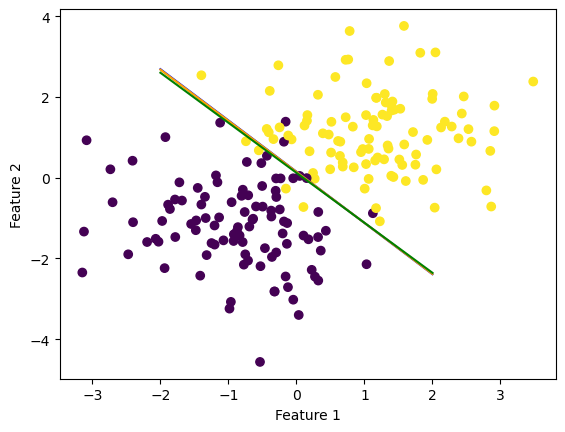

In [118]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2, "blue")
fig = draw_line(SLR.w, -2, 2, "orange")
fig = draw_line(MSLR.w, -2, 2, "green")
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In order to compare the learning rates of each algorithm, we can plot the loss over each epoch and see which algorithm converges faster.

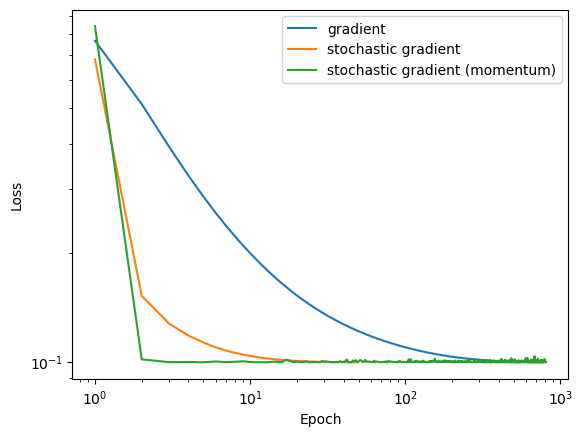

In [132]:
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps)+1, LR.loss_history, label = "gradient")

num_steps = len(SLR.loss_history)
plt.plot(np.arange(num_steps)+1, SLR.loss_history, label = "stochastic gradient")

num_steps = len(MSLR.loss_history)
plt.plot(np.arange(num_steps)+1, MSLR.loss_history, label = "stochastic gradient (momentum)")

xlab = plt.xlabel("Epoch")
ylab = plt.ylabel("Loss")

plt.loglog()

legend = plt.legend()

This example clealy shows that stochastic gradient descent with momentum converges the quickest of all three algorithms. This graph also shows that by choosing stochastic descent, you may run the risk of noise or "bouncing around" once the algorith nears the solution.

Comparing the scores we also see that the two stochastic gradients converge much quicker than the regular gradient descent:

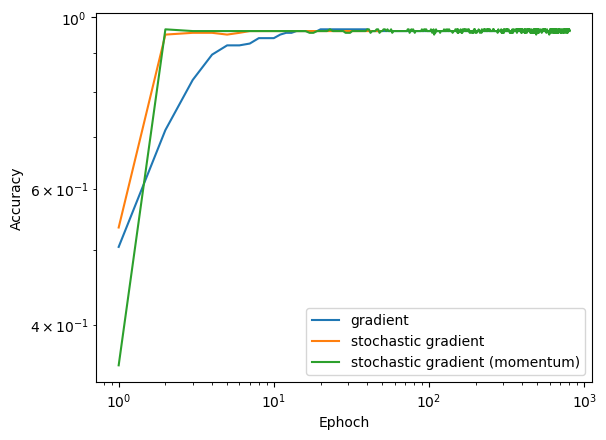

In [151]:
num_steps = len(LR.score_history)
plt.plot(np.arange(num_steps)+1, LR.score_history, label = "gradient")

num_steps = len(SLR.score_history)
plt.plot(np.arange(num_steps)+1, SLR.score_history, label = "stochastic gradient")

num_steps = len(MSLR.score_history)
plt.plot(np.arange(num_steps)+1, MSLR.score_history, label = "stochastic gradient (momentum)")

xlab = plt.xlabel("Ephoch")
ylab = plt.ylabel("Accuracy")

plt.loglog()

legend = plt.legend()

# Experiment 2: Effect of Batch Size on Convergence

The goal of this experiment is to compare the effect of batch size on convergence in emperical risk minimization. For this experiment, I used the ```make_blobs()``` function to make non-linearly seperable data but this time with 5 features. I used stochastic decent and set the batch sizes to different amounts but kept ```alpha``` and ```max_epochs``` both controled.

In [149]:
X, y = make_blobs(n_samples = 200, n_features = 5, centers = [(-1, -1, -1, -1, -1), (1, 1, 1, 1, 1)])

SLR1 = LogisticRegression()
SLR1.fit_stochastic(X, y, alpha = 0.5, max_epochs = 1000, batch_size = 50)

SLR2 = LogisticRegression()
SLR2.fit_stochastic(X, y, alpha = 0.5, max_epochs = 1000, batch_size = 10)

SLR3 = LogisticRegression()
SLR3.fit_stochastic(X, y, alpha = 0.5, max_epochs = 1000, batch_size = 2)

In order to compare the learning rates of each algorithm, I again plotted the loss over each epoch and see which algorithm converges faster.

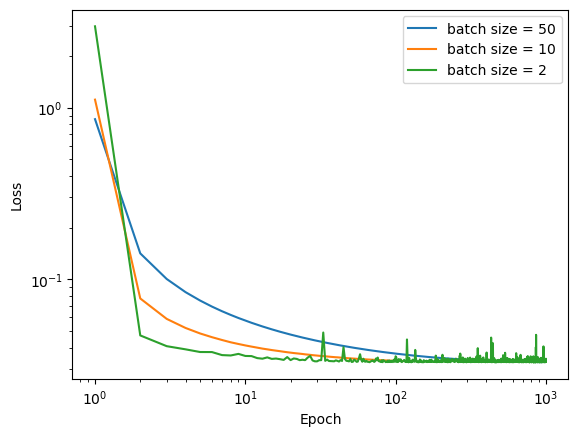

In [150]:
num_steps = len(SLR1.loss_history)
plt.plot(np.arange(num_steps)+1, SLR1.loss_history, label = "batch size = 50")

num_steps = len(SLR2.loss_history)
plt.plot(np.arange(num_steps)+1, SLR2.loss_history, label = "batch size = 10")

num_steps = len(SLR3.loss_history)
plt.plot(np.arange(num_steps)+1, SLR3.loss_history, label = "batch size = 2")

xlab = plt.xlabel("Epoch")
ylab = plt.ylabel("Loss")

plt.loglog()

legend = plt.legend()

This graph shows us that a smaller batch size converges faster, but it can also lead to much noisier outcomes as it nears the min. Therefore, when choosing a batch size it would be important to have these two things in mind and find a balance between quick convergence and noise.

# Experiment 3

In my final experiment, my goal was to show how the choise of alpha can effect convergence in emperical risk minimization. In this experiment, I again used the ```make_blobs()``` function to make non-linearly seperable data but this time with 5 features. This time though, I used regular gradient decent and set the alpha values to different values and kept ```max_epochs``` controled.

In [183]:
X, y = make_blobs(n_samples = 200, n_features = 5, centers = [(-1, -1, -1, -1, -1), (1, 1, 1, 1, 1)])

LR1 = LogisticRegression()
LR1.fit(X, y, alpha = 0.03, max_epochs = 1000)

LR2 = LogisticRegression()
LR2.fit(X, y, alpha = 3, max_epochs = 1000)

LR3 = LogisticRegression()
LR3.fit(X, y, alpha = 300, max_epochs = 1000)

In order to compare the learning rates of each algorithm, I again plotted the loss over each epoch and see which algorithm converges faster, and to perhaps see an example of a alpha that is "too big."

[]

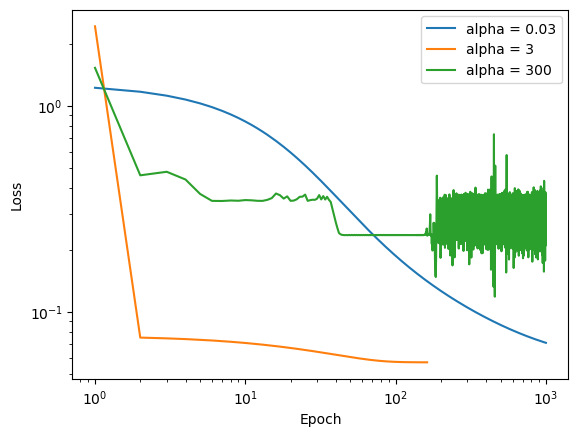

In [184]:
num_steps = len(LR1.loss_history)
plt.plot(np.arange(num_steps)+1, LR1.loss_history, label = "alpha = 0.03")

num_steps = len(LR2.loss_history)
plt.plot(np.arange(num_steps)+1, LR2.loss_history, label = "alpha = 3")

num_steps = len(LR3.loss_history)
plt.plot(np.arange(num_steps)+1, LR3.loss_history, label = "alpha = 300")

xlab = plt.xlabel("Epoch")
ylab = plt.ylabel("Loss")

legend = plt.legend()

plt.loglog()

This shows a choise of alpha = 0.03 that is too small it does not converge within the ```max_epochs```, a choise of alpha = 3 that seems to do pretty well, and a choise of alpha = 300 wich also doesnt converge because it "jumps over" the min. This also shows that when choosing alpha it is important to balance convergence speed with accuracy.